<a href="https://colab.research.google.com/github/AntonioWolf01/Algorithms-for-Massive-Datasets/blob/main/Algorithms_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **READ ME**

The following section contains code snippets used to download the dataset and covers locally. These snippets are included solely for documentation purposes. However, to enhance efficiency and reduce waiting time when running this notebook on Google Colab, I have uploaded the files to my Google Drive. This allows them to be downloaded directly. Therefore, please start running the code from the "**Start from here**" section.

## **Dataset Download**

In [ ]:
import os
import kaggle

In [ ]:
os.environ['KAGGLE_USERNAME'] = "xxxxxx"
os.environ['KAGGLE_KEY'] = "xxxxxx"

In [ ]:
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews

## **Download Covers**

The following code is executed after the datasets have been downloaded, loaded, merged, and preprocessed.

In [ ]:
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

In [ ]:
os.makedirs("covers", exist_ok=True)

def download_image(url, filename):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img.save(filename)
    except Exception as e:
        print(f"Error with {url}: {e}")

for i, row in tqdm(df.iterrows(), total=len(df)):
    image_url = row["image"]
    filename = f"covers/{i}.jpg"
    download_image(image_url, filename)

# **START FROM HERE**



# **Dataset Uploading**

In [1]:
!gdown 13T06eWXAzIzlCezTT5VqiIK_YcK65bZA
!gdown 145mS_XMBx8xstYCPUmLdfG7s0oeotsJ0

Downloading...
From (original): https://drive.google.com/uc?id=13T06eWXAzIzlCezTT5VqiIK_YcK65bZA
From (redirected): https://drive.google.com/uc?id=13T06eWXAzIzlCezTT5VqiIK_YcK65bZA&confirm=t&uuid=de9627ad-ff26-4127-b384-12ee1fec827f
To: /content/books_data.csv
100% 181M/181M [00:05<00:00, 30.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=145mS_XMBx8xstYCPUmLdfG7s0oeotsJ0
From (redirected): https://drive.google.com/uc?id=145mS_XMBx8xstYCPUmLdfG7s0oeotsJ0&confirm=t&uuid=779b1bd7-07e5-4ae2-bec6-b1fea2e06eca
To: /content/Books_rating.csv
100% 2.86G/2.86G [00:57<00:00, 49.4MB/s]


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('books_data.csv')
df1 = pd.read_csv('Books_rating.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [6]:
title_counts = df1['Title'].value_counts()
(title_counts >= 10).sum()

np.int64(43902)

In [7]:
threshold = title_counts[title_counts >= 10].index
df1_threshold = df1[df1['Title'].isin(threshold)]

In [8]:
avg_scores = df1_threshold.groupby('Title')['review/score'].mean().reset_index()
avg_scores.rename(columns={'review/score': 'avg_score'}, inplace=True)

In [9]:
df = pd.merge(avg_scores, df[['Title', 'image']], on='Title', how='left')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43902 entries, 0 to 43901
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      43902 non-null  object 
 1   avg_score  43902 non-null  float64
 2   image      36050 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


# **Preprocessing**

In [11]:
df['Rating'] = df['avg_score'].apply(lambda x: 'Low' if x < 2.8 else 'Medium' if 2.5 <= x < 3.8 else 'High')

In [12]:
df.head()

,Title,avg_score,image,Rating
0,"""A"" IS FOR ALIBI",3.672727,http://books.google.com/books/content?id=xZjj2...,Medium
1,"""Beatles"" Illustrated Lyrics",4.384615,http://books.google.com/books/content?id=_uvsA...,High
2,"""C"" is for Corpse (A Kinsey Millhone mystery, ...",4.170000,http://books.google.com/books/content?id=rLf-v...,High
3,"""Charlie needs a cloak""",5.000000,http://books.google.com/books/content?id=Gs5BP...,High
4,"""Cool Stuff"" They Should Teach in School: Crui...",4.772727,http://books.google.com/books/content?id=wsn46...,High


In [13]:
df.dropna(subset=['Rating'], inplace=True)

In [14]:
df.dropna(subset=['image'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36050 entries, 0 to 43901
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      36050 non-null  object 
 1   avg_score  36050 non-null  float64
 2   image      36050 non-null  object 
 3   Rating     36050 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [16]:
df['Rating'].value_counts()

,count
Rating,
High,29330
Medium,6002
Low,718


In [17]:
df['Rating'].value_counts(normalize=True)

,proportion
Rating,
High,0.813592
Medium,0.166491
Low,0.019917


In [18]:
import matplotlib.pyplot as plt

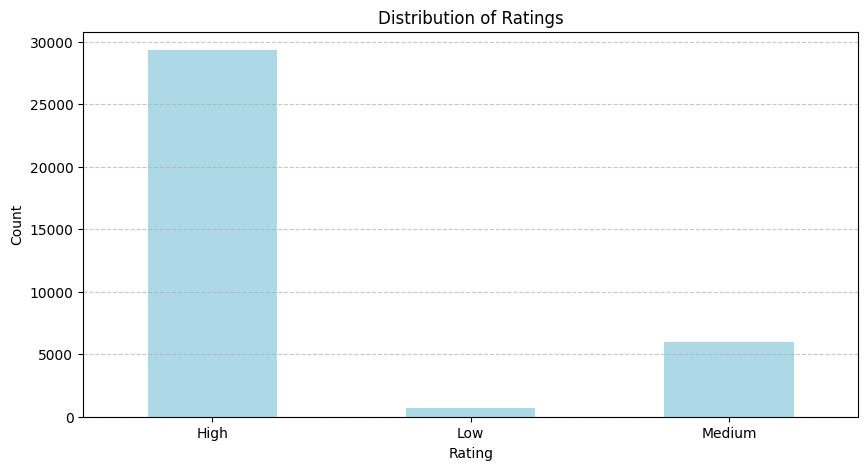

In [19]:
df['Rating'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='lightblue')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# **Covers Download**

In [20]:
import os
import requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm

In [21]:
data_dir = "/content/covers"
os.makedirs(data_dir, exist_ok=True)

In [22]:
!gdown "https://drive.google.com/uc?id=1NWe0y80w1rQno_Hq7PW9kWEwUZM5i_7C"
!unrar x covers.rar


Output streaming troncato alle ultime 5000 righe.
Extracting  covers/4564.jpg                                               85%  OK 
Extracting  covers/4565.jpg                                               85%  OK 
Extracting  covers/4566.jpg                                               85%  OK 
Extracting  covers/4567.jpg                                               86%  OK 
Extracting  covers/4568.jpg                                               86%  OK 
Extracting  covers/4570.jpg                                               86%  OK 
Extracting  covers/4571.jpg                                               86%  OK 
Extracting  covers/4572.jpg                                               86%  OK 
Extracting  covers/4574.jpg                                               86%  OK 
Extracting  covers/4576.jpg                                               86%  OK 
Extracting  covers/4577.jpg   

In [23]:
df['image_path'] = df.index.astype(str) + ".jpg"
df['image_path'] = df['image_path'].apply(lambda x: os.path.join(data_dir, x))

In [24]:
df.head()

,Title,avg_score,image,Rating,image_path
0,"""A"" IS FOR ALIBI",3.672727,http://books.google.com/books/content?id=xZjj2...,Medium,/content/covers/0.jpg
1,"""Beatles"" Illustrated Lyrics",4.384615,http://books.google.com/books/content?id=_uvsA...,High,/content/covers/1.jpg
2,"""C"" is for Corpse (A Kinsey Millhone mystery, ...",4.170000,http://books.google.com/books/content?id=rLf-v...,High,/content/covers/2.jpg
3,"""Charlie needs a cloak""",5.000000,http://books.google.com/books/content?id=Gs5BP...,High,/content/covers/3.jpg
4,"""Cool Stuff"" They Should Teach in School: Crui...",4.772727,http://books.google.com/books/content?id=wsn46...,High,/content/covers/4.jpg


# **Training/Validation Set**

In [25]:
import numpy as np
import tensorflow as tf

In [26]:
image_paths = df['image_path'].values

label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
labels = (df['Rating'].map(label_mapping)).values

labels = tf.keras.utils.to_categorical(labels, len(label_mapping))

In [27]:
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = img / 255.0
    return img, label

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))

In [29]:
dataset = dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [30]:
batch = 32

In [31]:
dataset.shuffle(len(image_paths))

<_ShuffleDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [32]:
dataset = dataset.batch(batch).prefetch(tf.data.experimental.AUTOTUNE)

In [33]:
len(dataset)

1127

In [34]:
train_size = int(.7*len(dataset))
val_size = len(dataset) - train_size

In [35]:
train = dataset.take(train_size)
validation = dataset.skip(train_size).take(val_size)

In [36]:
for batch in train.take(1):
    images, labels = batch
    print(images[0].shape)


(224, 224, 3)


# **Neural Network Training**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam

## **Shallow Neural Network**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(8, (3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 98568)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │       1,577,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,577,379 (6.02 MB)

 Trainable params: 1,577,379 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 47s 57ms/step - accuracy: 0.7815 - loss: 0.9454 - val_accuracy: 0.8133 - val_loss: 0.5846
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8137 - loss: 0.5633 - val_accuracy: 0.8132 - val_loss: 0.5695
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.8219 - loss: 0.5107 - val_accuracy: 0.8110 - val_loss: 0.5720
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.8467 - loss: 0.4378 - val_accuracy: 0.8017 - val_loss: 0.6267
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8714 - loss: 0.3681 - val_accuracy: 0.7924 - val_loss: 0.7232
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 64s 56ms/step - accuracy: 0.8925 - loss: 0.3058 - val_accuracy: 0.7998 - val_loss: 0.9185


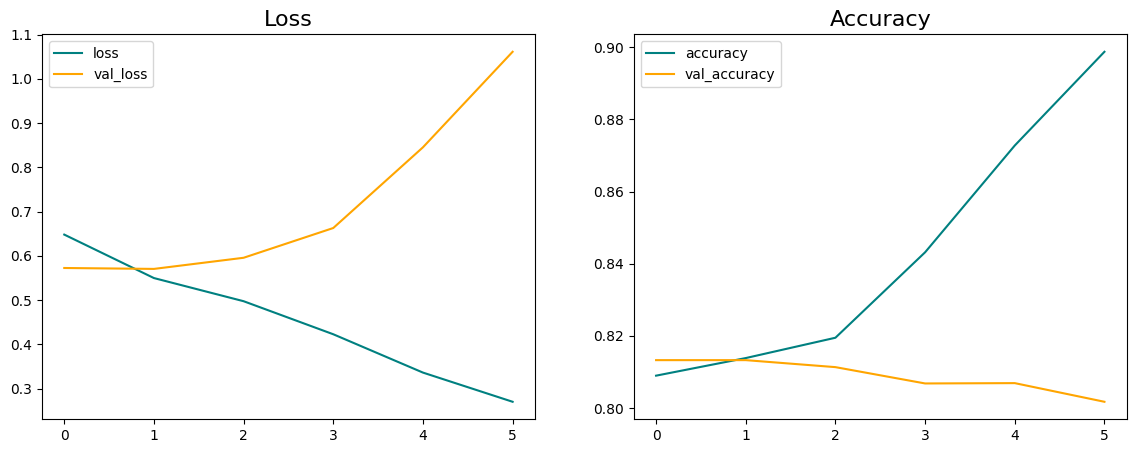

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist.history['loss'], color='teal', label='loss')
axes[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("neural_network.h5")
files.download("neural_network.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Deep Neural Network #1**


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,769,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,779,635 (10.60 MB)

 Trainable params: 2,779,635 (10.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_1 = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.8082 - loss: 0.5819 - val_accuracy: 0.8133 - val_loss: 0.5458
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8140 - loss: 0.5530 - val_accuracy: 0.8133 - val_loss: 0.5409
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.8140 - loss: 0.5503 - val_accuracy: 0.8133 - val_loss: 0.5397
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8143 - loss: 0.5446 - val_accuracy: 0.8131 - val_loss: 0.5402
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8163 - loss: 0.5316 - val_accuracy: 0.8130 - val_loss: 0.5441
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8206 - loss: 0.5102 - val_accuracy: 0.8124 - val_loss: 0.5500
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.8292 - loss: 0.4807 - val_accuracy: 0.8068 - val_loss: 0.6005


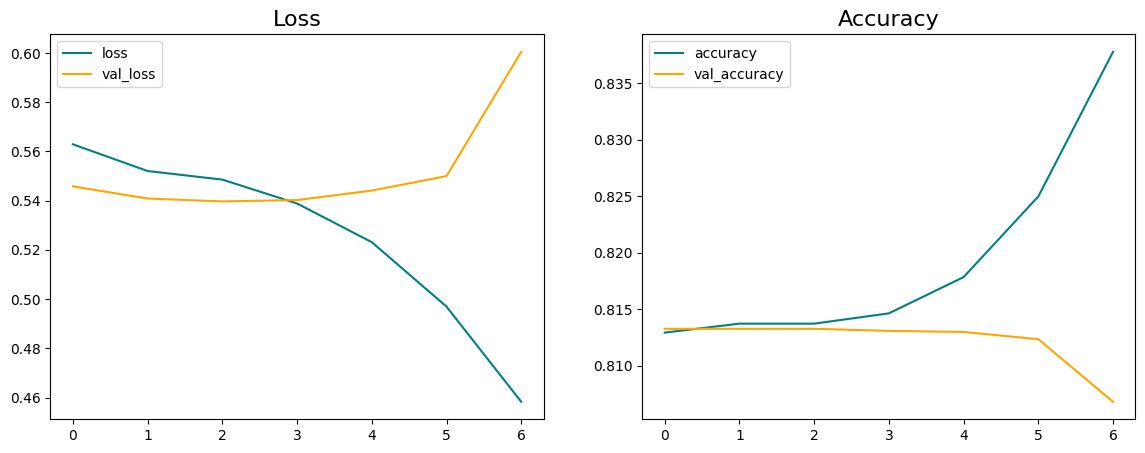

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_1.history['loss'], color='teal', label='loss')
axes[0].plot(hist_1.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_1.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_1.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("deep_learning_#1.h5")
files.download("deep_learning_#1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Deep Neural Network #2**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 24, 24, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,883 (2.30 MB)

 Trainable params: 602,883 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_2 = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 67s 79ms/step - accuracy: 0.8103 - loss: 0.5728 - val_accuracy: 0.8133 - val_loss: 0.5442
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8140 - loss: 0.5534 - val_accuracy: 0.8133 - val_loss: 0.5466
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.8140 - loss: 0.5528 - val_accuracy: 0.8133 - val_loss: 0.5392
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.8140 - loss: 0.5520 - val_accuracy: 0.8133 - val_loss: 0.5383
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.8140 - loss: 0.5514 - val_accuracy: 0.8133 - val_loss: 0.5375
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.8140 - loss: 0.5508 - val_accuracy: 0.8133 - val_loss: 0.5373
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.8140 - loss: 0.5505 - val_accuracy: 0.8133 - val_loss: 0.5373
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 63s 79ms/step - accuracy: 0.8140 - loss: 0.5503 - 

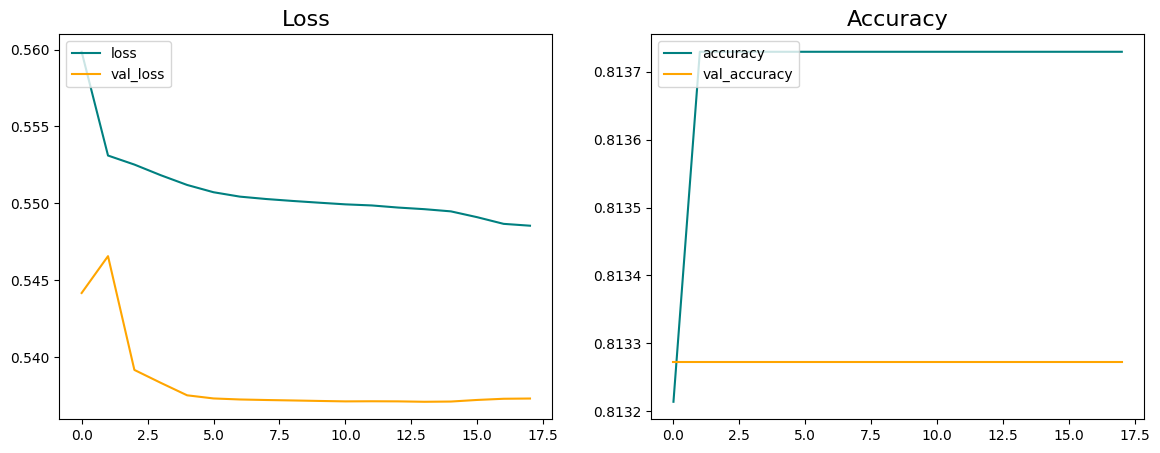

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_2.history['loss'], color='teal', label='loss')
axes[0].plot(hist_2.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_2.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_2.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("deep_learning_#2.h5")
files.download("deep_learning_#2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Overfitting Mitigation**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,883 (2.30 MB)

 Trainable params: 602,883 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_1_dropout = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 61s 67ms/step - accuracy: 0.8077 - loss: 0.5808 - val_accuracy: 0.8133 - val_loss: 0.5421
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8140 - loss: 0.5552 - val_accuracy: 0.8133 - val_loss: 0.5385
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8140 - loss: 0.5549 - val_accuracy: 0.8133 - val_loss: 0.5380
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.8140 - loss: 0.5527 - val_accuracy: 0.8133 - val_loss: 0.5375
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.8140 - loss: 0.5527 - val_accuracy: 0.8133 - val_loss: 0.5371
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.8140 - loss: 0.5526 - val_accuracy: 0.8133 - val_loss: 0.5372
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8140 - loss: 0.5510 - val_accuracy: 0.8133 - val_loss: 0.5370
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.8140 - loss: 0.5511 - 

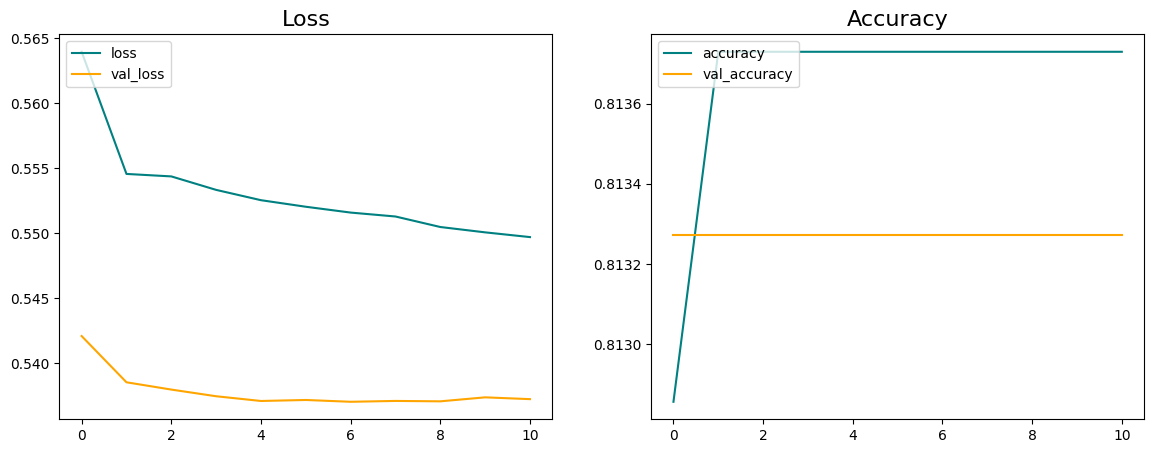

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_1_dropout.history['loss'], color='teal', label='loss')
axes[0].plot(hist_1_dropout.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_1_dropout.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_1_dropout.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("model_dropout.h5")
files.download("model_dropout.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Results Comparison**

**NOTE**: Please upload the previously downloaded models to the Colab session; otherwise, the following code will produce errors.

In [39]:
from tensorflow.keras.models import load_model

In [41]:
model_names = [ "neural_network", "deep_learning_#1", "deep_learning_#2","model_dropout"]
for model_name in model_names:
    model = load_model(f"{model_name}.h5")
    loss, accuracy = model.evaluate(validation, verbose=0)
    print(f"Model: {model_name}")
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}\n")

Model: neural_network
Loss: 0.5695, Accuracy: 0.8132



Model: deep_learning_#1
Loss: 0.5397, Accuracy: 0.8133

Model: deep_learning_#2
Loss: 0.5371, Accuracy: 0.8133



Model: model_dropout
Loss: 0.5358, Accuracy: 0.8133



## **Hyperparameter Tuning**

## **Learning Rate: 0.01 - Batch Size: 32**


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_tuning_1 = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.8039 - loss: 0.6750 - val_accuracy: 0.8133 - val_loss: 0.5381
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.8140 - loss: 0.5526 - val_accuracy: 0.8133 - val_loss: 0.5376
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.8140 - loss: 0.5520 - val_accuracy: 0.8133 - val_loss: 0.5376
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.8140 - loss: 0.5504 - val_accuracy: 0.8133 - val_loss: 0.5376
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8140 - loss: 0.5491 - val_accuracy: 0.8133 - val_loss: 0.5374
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.8140 - loss: 0.5489 - val_accuracy: 0.8133 - val_loss: 0.5374
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.8140 - loss: 0.5485 - val_accuracy: 0.8133 - val_loss: 0.5374
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8140 - loss: 0.5485 - 

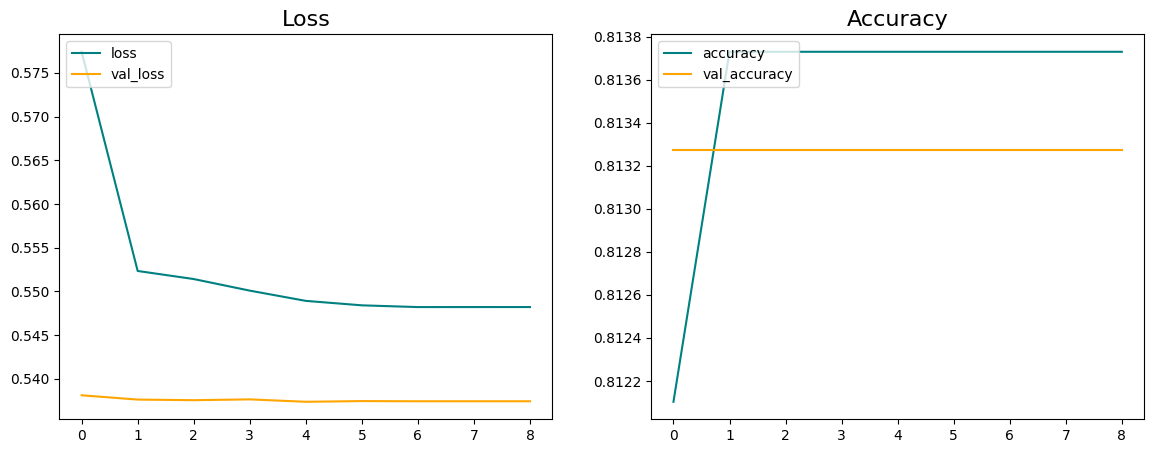

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_tuning_1.history['loss'], color='teal', label='loss')
axes[0].plot(hist_tuning_1.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_tuning_1.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_tuning_1.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("model_tuning_1.h5")
files.download("model_tuning_1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Learning Rate: 0.0001 - Batch Size: 32**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_tuning_2 = model.fit(train, epochs=20, validation_data=validation, callbacks=[early_stopping], verbose=1)

Epoch 1/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 55s 65ms/step - accuracy: 0.8105 - loss: 0.5805 - val_accuracy: 0.8133 - val_loss: 0.5432
Epoch 2/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 94s 82ms/step - accuracy: 0.8140 - loss: 0.5567 - val_accuracy: 0.8133 - val_loss: 0.5404
Epoch 3/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.8140 - loss: 0.5521 - val_accuracy: 0.8133 - val_loss: 0.5397
Epoch 4/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.8140 - loss: 0.5493 - val_accuracy: 0.8133 - val_loss: 0.5393
Epoch 5/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.8140 - loss: 0.5475 - val_accuracy: 0.8133 - val_loss: 0.5393
Epoch 6/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8140 - loss: 0.5460 - val_accuracy: 0.8133 - val_loss: 0.5391
Epoch 7/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.8140 - loss: 0.5443 - val_accuracy: 0.8133 - val_loss: 0.5393
Epoch 8/20
788/788 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.8140 - loss: 0.5424 - 

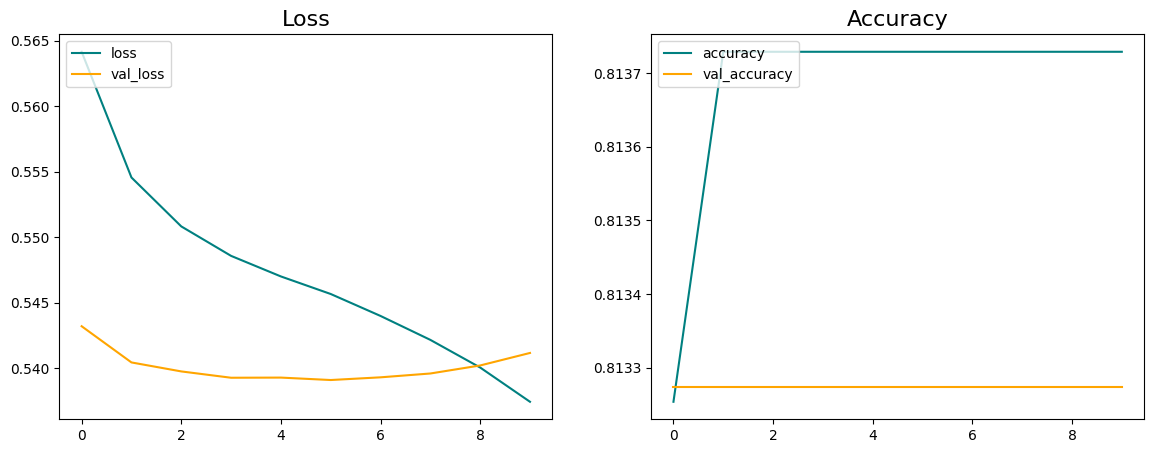

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_tuning_2.history['loss'], color='teal', label='loss')
axes[0].plot(hist_tuning_2.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_tuning_2.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_tuning_2.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("model_tuning_2.h5")
files.download("model_tuning_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Learning Rate: 0.01 - Batch Size: 16**

In [42]:
image_paths = df['image_path'].values

label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
labels = (df['Rating'].map(label_mapping)).values

labels = tf.keras.utils.to_categorical(labels, len(label_mapping))

In [43]:
dataset_16 = tf.data.Dataset.from_tensor_slices((image_paths, labels))

In [44]:
dataset_16 = dataset_16.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [45]:
batch = 16

In [46]:
dataset_16.shuffle(len(image_paths))

<_ShuffleDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float64, name=None))>

In [47]:
dataset_16 = dataset_16.batch(batch).prefetch(tf.data.experimental.AUTOTUNE)

In [48]:
len(dataset_16)

2254

In [49]:
train_size = int(.7*len(dataset_16))
val_size = len(dataset_16) - train_size

In [50]:
train_16 = dataset_16.take(train_size)
validation_16 = dataset_16.skip(train_size).take(val_size)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_tuning_3 = model.fit(train_16, epochs=20, validation_data=validation_16, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.8084 - loss: 0.5860 - val_accuracy: 0.8134 - val_loss: 0.5410
Epoch 2/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8140 - loss: 0.5518 - val_accuracy: 0.8134 - val_loss: 0.5379
Epoch 3/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8140 - loss: 0.5496 - val_accuracy: 0.8134 - val_loss: 0.5375
Epoch 4/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.8140 - loss: 0.5489 - val_accuracy: 0.8134 - val_loss: 0.5374
Epoch 5/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8140 - loss: 0.5489 - val_accuracy: 0.8134 - val_loss: 0.5374
Epoch 6/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8140 - loss: 0.5489 - val_accuracy: 0.8134 - val_loss: 0.5374
Epoch 7/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8140 - loss: 0.5489 - val_accuracy: 0.8134 - val_loss: 0.5374
Epoch 8/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8140 -

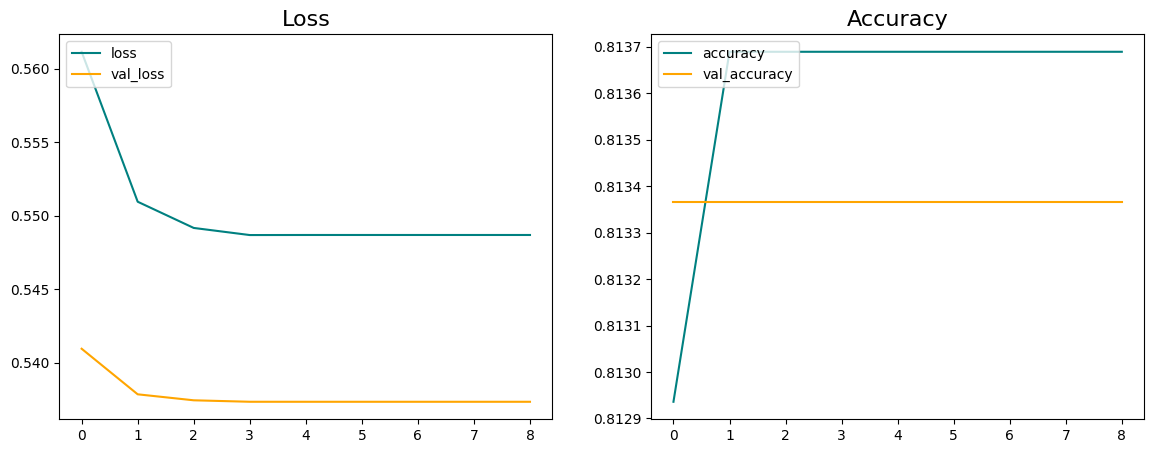

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_tuning_3.history['loss'], color='teal', label='loss')
axes[0].plot(hist_tuning_3.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_tuning_3.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_tuning_3.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("model_tuning_3.h5")
files.download("model_tuning_3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Learning Rate: 0.0001 - Batch Size: 16**

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
hist_tuning_4 = model.fit(train_16, epochs=20, validation_data=validation_16, callbacks=[early_stopping], verbose=1)

Epoch 1/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 71s 43ms/step - accuracy: 0.8096 - loss: 0.5802 - val_accuracy: 0.8134 - val_loss: 0.5545
Epoch 2/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8140 - loss: 0.5591 - val_accuracy: 0.8134 - val_loss: 0.5451
Epoch 3/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.8140 - loss: 0.5544 - val_accuracy: 0.8134 - val_loss: 0.5447
Epoch 4/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8140 - loss: 0.5524 - val_accuracy: 0.8134 - val_loss: 0.5413
Epoch 5/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8140 - loss: 0.5524 - val_accuracy: 0.8134 - val_loss: 0.5406
Epoch 6/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8140 - loss: 0.5502 - val_accuracy: 0.8134 - val_loss: 0.5406
Epoch 7/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.8140 - loss: 0.5503 - val_accuracy: 0.8134 - val_loss: 0.5390
Epoch 8/20
1577/1577 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.8140 -

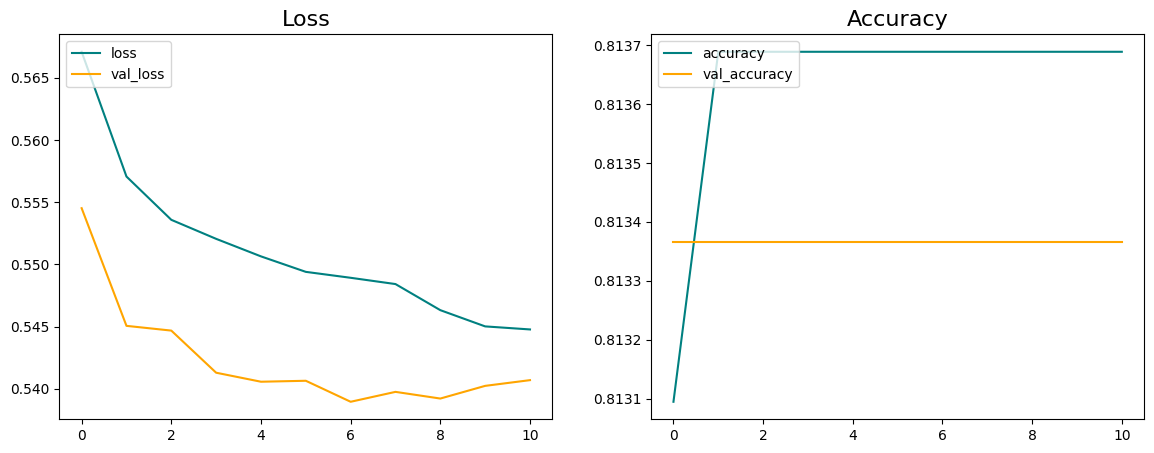

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(hist_tuning_4.history['loss'], color='teal', label='loss')
axes[0].plot(hist_tuning_4.history['val_loss'], color='orange', label='val_loss')
axes[0].set_title('Loss', fontsize=16)
axes[0].legend(loc="upper left")

axes[1].plot(hist_tuning_4.history['accuracy'], color='teal', label='accuracy')
axes[1].plot(hist_tuning_4.history['val_accuracy'], color='orange', label='val_accuracy')
axes[1].set_title('Accuracy', fontsize=16)
axes[1].legend(loc="upper left")

plt.show()

In [ ]:
from google.colab import files

model.save("model_tuning_4.h5")
files.download("model_tuning_4.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Final Comparison**

**NOTE**: Please upload the previously downloaded models to the Colab session; otherwise, the following code will produce errors.

In [51]:
model_names = [ "model_tuning_1", "model_tuning_2"]
for model_name in model_names:
    model = load_model(f"{model_name}.h5")
    loss, accuracy = model.evaluate(validation, verbose=0)
    print(f"Model: {model_name}")
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}\n")

Model: model_tuning_1
Loss: 0.5374, Accuracy: 0.8133

Model: model_tuning_2
Loss: 0.5391, Accuracy: 0.8133



In [52]:
model_names = [ "model_tuning_3", "model_tuning_4"]
for model_name in model_names:
    model = load_model(f"{model_name}.h5")
    loss, accuracy = model.evaluate(validation_16, verbose=0)
    print(f"Model: {model_name}")
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}\n")

Model: model_tuning_3
Loss: 0.5374, Accuracy: 0.8134

Model: model_tuning_4
Loss: 0.5390, Accuracy: 0.8134



# **Naive Predictor**

In [53]:
all_labels = []
for _, labels in validation_16:
    all_labels.append(labels.numpy())
all_labels = np.concatenate(all_labels, axis=0)

label_indices = np.argmax(all_labels, axis=1)

unique, counts = np.unique(label_indices, return_counts=True)
distribution = dict(zip(unique, counts))

In [54]:
print("Normalized Distribution:", {k: v / 10818 for k, v in distribution.items()})

Normalized Distribution: {np.int64(0): np.float64(0.016176742466259938), np.int64(1): np.float64(0.17045664633019042), np.int64(2): np.float64(0.8133666112035497)}


# **Variation of Threshold**


In [55]:
df = pd.read_csv('books_data.csv')
df1 = pd.read_csv('Books_rating.csv')

In [56]:
def distribution_by_threshold(threshold_value, df1, df):
    title_counts = df1['Title'].value_counts()

    threshold_titles = title_counts[title_counts >= threshold_value].index

    df1_threshold = df1[df1['Title'].isin(threshold_titles)]

    avg_scores = df1_threshold.groupby('Title')['review/score'].mean().reset_index()

    avg_scores.rename(columns={'review/score': 'avg_score'}, inplace=True)

    df_merged = pd.merge(avg_scores, df[['Title', 'image']], on='Title', how='left')

    df_merged['Rating'] = df_merged['avg_score'].apply(
        lambda x: 'Low' if x < 2.8 else 'Medium' if 2.5 <= x < 3.8 else 'High'
    )

    df_merged.dropna(subset=['Rating', 'image'], inplace=True)


    return df_merged['Rating'].value_counts(normalize=True)


In [57]:
# Threshold : 5
print(distribution_by_threshold(5, df1, df))

Rating
High      0.810310
Medium    0.165328
Low       0.024361
Name: proportion, dtype: float64


In [58]:
# Threshold : 3
print(distribution_by_threshold(3, df1, df))

Rating
High      0.792421
Medium    0.174394
Low       0.033185
Name: proportion, dtype: float64


In [59]:
# Threshold : 1
print(distribution_by_threshold(1, df1, df))

Rating
High      0.800914
Medium    0.148358
Low       0.050727
Name: proportion, dtype: float64


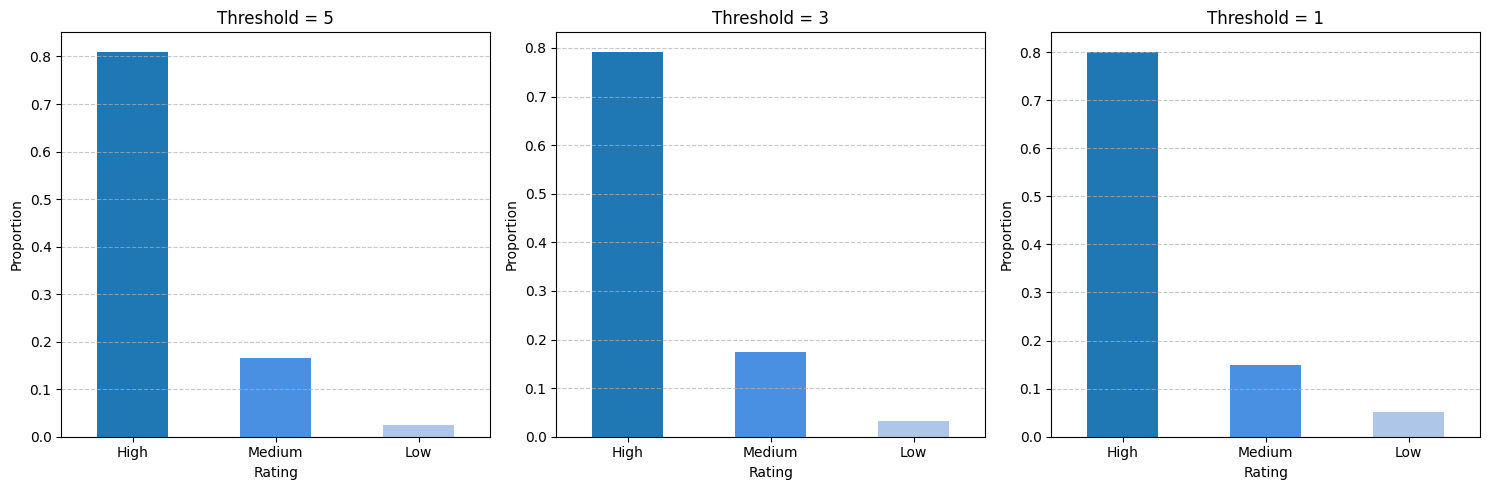

In [60]:
thresholds = [5, 3, 1]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, threshold in enumerate(thresholds):
    distribution = distribution_by_threshold(threshold, df1, df)
    distribution.plot(kind='bar', color=['#1f77b4', '#4a90e2', '#aec7e8'], ax=axes[i])
    axes[i].set_title(f'Threshold = {threshold}')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xticklabels(distribution.index, rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()